In [1]:
# import libraries & packages

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


import assaytools


from assaytools import platereader

In [2]:
# define ligand concentration array for 384-well experiment

concentrations_384 = np.array([0.00000000e+00, 8e-09, 1.14167319779e-08, 1.6292721132e-08, 2.32512037944e-08,
                              3.31815952356e-08, 4.73531724257e-08, 6.75773097361e-08, 9.64390041309e-08,
                              1.37627282798e-07, 1.96406725069e-07, 2.80290367347e-07, 4e-07, 5.70836598897e-07,
                              8.146360566e-07, 1.16256018972e-06, 1.65907976178e-06, 2.36765862128e-06,
                              3.37886548681e-06, 4.82195020655e-06, 6.88136413989e-06, 9.82033625345e-06,
                              1.40145183674e-05, 2e-05])

In [3]:
# define ligand concentration array for 96-multiple_well

concentrations_96_multiple = np.array([  0.00000000e+00,   8.00000000e-09,   1.75e-08,
         3.83e-08,   8.37e-08,   1.83e-07,
         4e-07,   8.75e-07,   1.91e-06,
         4.18e-06,   9.15e-06,   2e-05])

In [12]:
# define ligand concentration array for 96-single_well experiment

concentrations_96_single = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])

In [5]:
# load data files

# 384-well files

filenames_384 = ['p38_4lig_tween_20170627_150509.xml']

datapath = 'infinite_results'

# 96-multiple_well files
filenames_96_multiple = sorted(glob('infinite_results/96_multiple/*.xml'))
filenames_96_multiple.sort(key=os.path.getmtime)

# 96-single_well files
filenames_96_single = sorted(glob('infinite_results/96_single/*.xml'))
filenames_96_single.sort(key=os.path.getmtime)

In [6]:
# read data files

# 384-well

reads_384 = list()
nreads_384 = len(filenames_384)
for read in range(nreads_384):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames_384[read]))
    reads_384.append(read)
    
# 96-multiple_well
reads_96_multiple = list()
nreads_96_multiple = len(filenames_96_multiple)
for read in range(nreads_96_multiple):
    read = platereader.read_icontrol_xml(filenames_96_multiple[read])
    reads_96_multiple.append(read) 

96-single_well 

reads_96_single = list()
nreads_96_single = len(filenames_96_single)
for read in range(nreads_96_single):
    read = platereader.read_icontrol_xml(filenames_96_single[read])
    reads_96_single.append(read)    


In [7]:
# create functions to extract data

def extract_data_384(row):
    row_array = np.zeros(24)
    ncol = 24
    for well in range(ncol):
        index = well + 1
        well_name = '%s%s' % (row, index)
        row_array[well] = reads_384[0]['280_480_TOP_120'][well_name]
        
    return(row_array)

def extract_data_96_multiple(row,i):
    row_array = np.zeros(12)
    ncol = 12
    for well in range(ncol):
        index = well + 1
        well_name = '%s%s' % (row, index)
        row_array[well] = reads_96_multiple[i]['em280'][well_name]['480']
        
    return(row_array)

def extract_data_96_single(well):
    measurements_list = list()
    measurements = [reads_96_single[i]['ex280_em480_top_gain100'][well] for i in range(17)]
    for i in range(len(measurements)):
        measurements = [x if x != 'OVER' else 0 for x in measurements]
        measurements = [float(i) for i in measurements]
    measurements_list.append(measurements)
    # unpack nested list
    measurements_unpack= [x for sub_list in measurements_list for x in sub_list]
    
    return(measurements_unpack)

In [8]:
# extract and organize data across ligand concentration

# 384-well, no tween

Bos_prot_384 = extract_data_384('A')
Bos_buff_384 = extract_data_384('B')

Bos_iso_prot_384 = extract_data_384('C')
Bos_iso_buff_384 = extract_data_384('D')

Erl_prot_384 = extract_data_384('E')
Erl_buff_384 = extract_data_384('F')

Gef_prot_384 = extract_data_384('G')
Gef_buff_384 = extract_data_384('H')


# 384-well, 0.05% tween 

Bos_prot_tween = extract_data_384('I')
Bos_buff_tween = extract_data_384('J')

Bos_iso_prot_tween = extract_data_384('K')
Bos_iso_buff_tween = extract_data_384('L')

Erl_prot_tween = extract_data_384('M')
Erl_buff_tween = extract_data_384('N')

Gef_prot_tween = extract_data_384('O')
Gef_buff_tween = extract_data_384('P')

# 96-multiple_well, no tween

Bos_prot_96_multiple = extract_data_96_multiple('A',0)
Bos_buff_96_multiple = extract_data_96_multiple('B',0)

Bos_iso_prot_96_multiple = extract_data_96_multiple('C',1)
Bos_iso_buff_96_multiple = extract_data_96_multiple('D',1)

Erl_prot_96_multiple = extract_data_96_multiple('E',2)
Erl_buff_96_multiple = extract_data_96_multiple('F',2)

Gef_prot_96_multiple = extract_data_96_multiple('G',3)
Gef_buff_96_multiple = extract_data_96_multiple('H',3)

# 96-single_well, no tween

Bos_prot_96_single = extract_data_96_single('A11')
Bos_buff_96_single = extract_data_96_single('A2')

Bos_iso_prot_96_single = extract_data_96_single('C11')
Bos_iso_buff_96_single = extract_data_96_single('C2')

Erl_prot_96_single = extract_data_96_single('E11')
Erl_buff_96_single = extract_data_96_single('E2')

Gef_prot_96_single = extract_data_96_single('G11')
Gef_buff_96_single = extract_data_96_single('G2')

In [16]:
# create plotting function

def plot(concentrations, prot, buff, i, lig, plate):
    current_palette = sns.color_palette('YlGnBu', 10)
    
    plt.semilogx(concentrations, prot, c=current_palette[i], marker='.', linewidth=2, markersize=6)
    plt.semilogx(concentrations, buff, c=current_palette[i], linestyle='--', linewidth=2, markersize=6)
    
    ax1.yaxis.set_tick_params(labelsize=8)
    ax1.xaxis.set_tick_params(labelsize=8)
    plt.minorticks_off()
    ax1.set_ylim(10**2, 60000)
    
    plt.legend(['p38 + ligand', 'ligand'], loc=2, prop={'size': 8})
    plt.title('%s, %s' %(lig, plate), fontsize=10)
    
    sns.set_style(style='white')
    sns.despine()

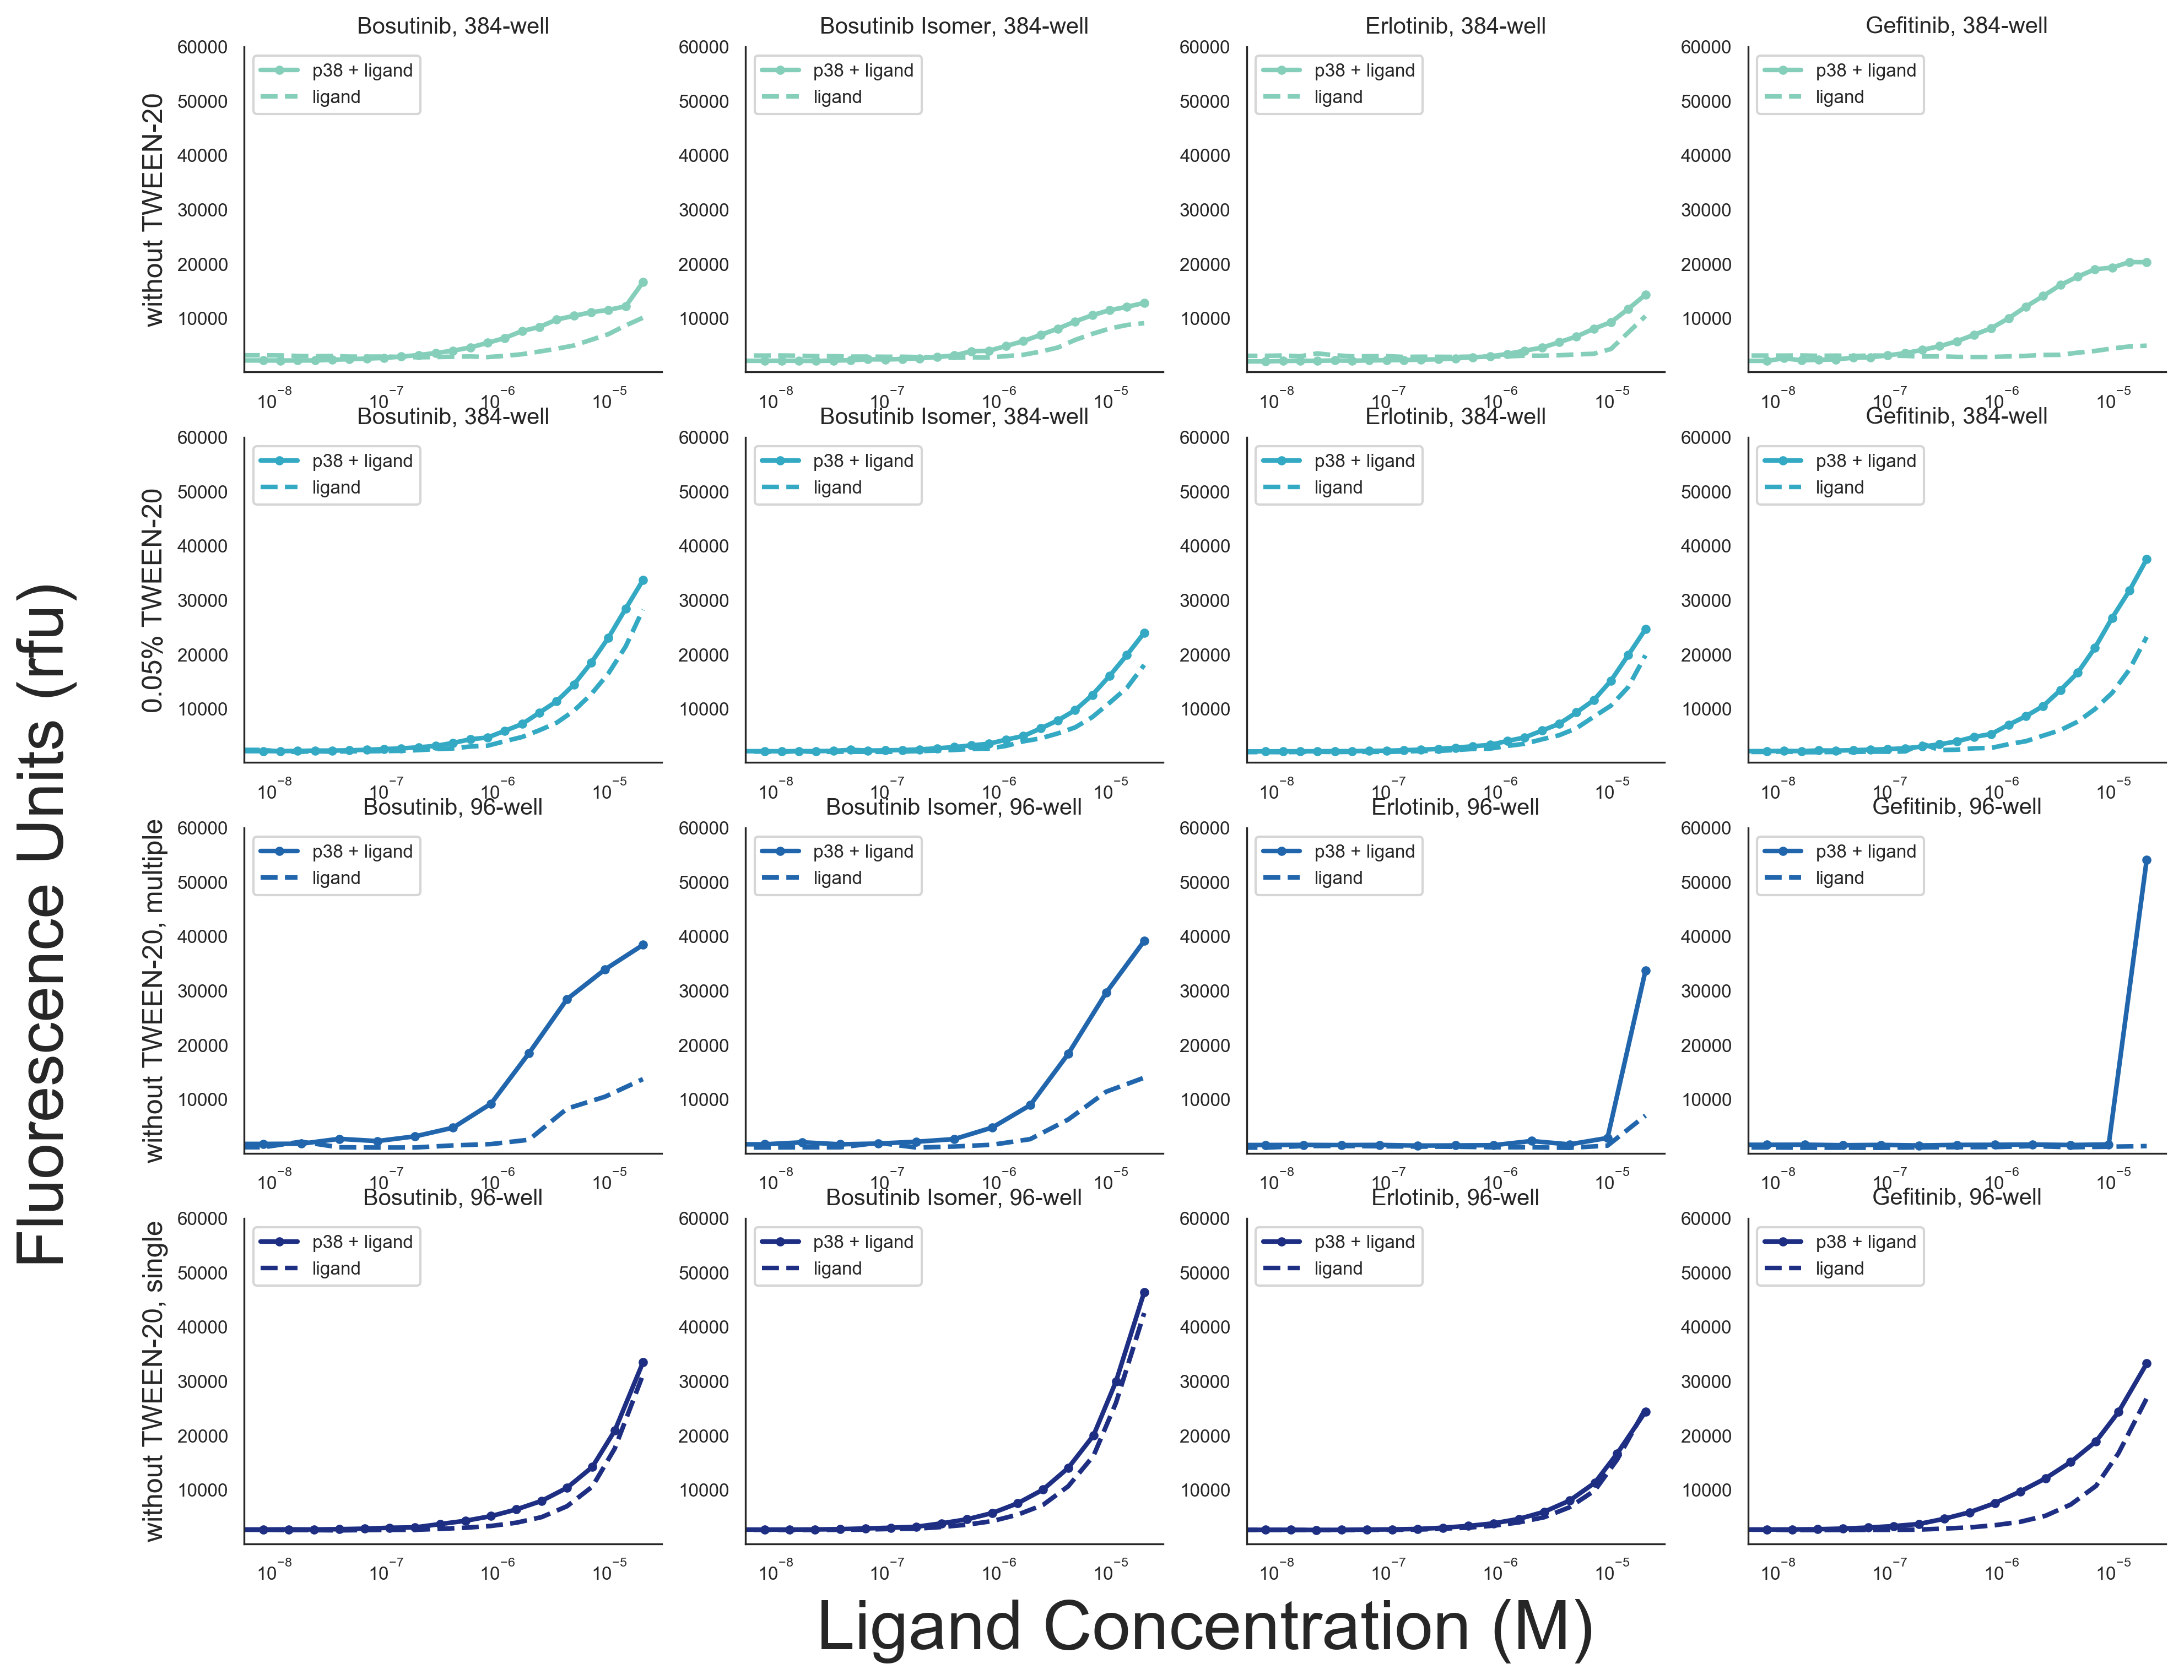

In [19]:
# plot data

fig = plt.figure(figsize=(15,12), dpi=300)

# plots 384-well, no tween

ax1 = fig.add_subplot(4,4,1)
Bos_384 = plot(concentrations= concentrations_384, prot=np.flip(Bos_prot_384, axis=0), buff=np.flip(Bos_buff_384, axis=0), lig='Bosutinib', i=3, plate='384-well')
axis = plt.gca()
plt.ylabel('without TWEEN-20', fontsize=12)

ax1 = fig.add_subplot(4,4,2)
Bos_iso_384 = plot(concentrations= concentrations_384, prot=np.flip(Bos_iso_prot_384, axis=0), buff=np.flip(Bos_iso_buff_384, axis=0), lig='Bosutinib Isomer', i=3, plate='384-well')

ax1 = fig.add_subplot(4,4,3)
Erl_384 = plot(concentrations= concentrations_384, prot=np.flip(Erl_prot_384, axis=0), buff=np.flip(Erl_buff_384, axis=0), lig='Erlotinib', i=3, plate='384-well')

ax1 = fig.add_subplot(4,4,4)
Gef_384 = plot(concentrations= concentrations_384, prot=np.flip(Gef_prot_384, axis=0), buff=np.flip(Gef_buff_384, axis=0), lig='Gefitinib', i=3, plate='384-well')

# plots 384-well, 0.05% tween

ax1 = fig.add_subplot(4,4,5)
Bos_tween = plot(concentrations= concentrations_384, prot=np.flip(Bos_prot_tween, axis=0), buff=np.flip(Bos_buff_tween, axis=0), lig='Bosutinib', i=5, plate='384-well')
axis = plt.gca()
plt.ylabel('0.05% TWEEN-20', fontsize=12)

ax1 = fig.add_subplot(4,4,6)
Bos_iso_tween = plot(concentrations= concentrations_384, prot=np.flip(Bos_iso_prot_tween, axis=0), buff=np.flip(Bos_iso_buff_tween, axis=0), lig='Bosutinib Isomer', i=5, plate='384-well')

ax1 = fig.add_subplot(4,4,7)
Erl_tween = plot(concentrations= concentrations_384, prot=np.flip(Erl_prot_tween, axis=0), buff=np.flip(Erl_buff_tween, axis=0), lig='Erlotinib', i=5, plate='384-well')

ax1 = fig.add_subplot(4,4,8)
Gef_tween = plot(concentrations= concentrations_384, prot=np.flip(Gef_prot_tween, axis=0), buff=np.flip(Gef_buff_tween, axis=0), lig='Gefitinib', i=5, plate='384-well')

# plots 96-well multiple, no tween

ax1 = fig.add_subplot(4,4,9)
Bos_96 = plot(concentrations=concentrations_96_multiple, prot=np.flip(Bos_prot_96_multiple), buff=np.flip(Bos_buff_96_multiple), lig='Bosutinib', i=7, plate='96-well')
axis = plt.gca()
plt.ylabel('without TWEEN-20, multiple', fontsize=12)

ax1 = fig.add_subplot(4,4,10)
Bos_iso_96 = plot(concentrations=concentrations_96_multiple, prot=np.flip(Bos_iso_prot_96_multiple), buff=np.flip(Bos_iso_buff_96_multiple), lig='Bosutinib Isomer', i=7, plate='96-well')

ax1 = fig.add_subplot(4,4,11)
Erl_96 = plot(concentrations=concentrations_96_multiple, prot=np.flip(Erl_prot_96_multiple), buff=np.flip(Erl_buff_96_multiple), lig='Erlotinib', i=7, plate='96-well')

ax1 = fig.add_subplot(4,4,12)
Gef_96 = plot(concentrations=concentrations_96_multiple, prot=np.flip(Gef_prot_96_multiple), buff=np.flip(Gef_buff_96_multiple), lig='Gefitinib', i=7, plate='96-well')

# plots 96-well single, no tween

ax1 = fig.add_subplot(4,4,13)
Bos_96 = plot(concentrations=concentrations_96_single, prot=Bos_prot_96_single, buff=Bos_buff_96_single, lig='Bosutinib', i=9, plate='96-well')
axis = plt.gca()
plt.ylabel('without TWEEN-20, single', fontsize=12)

ax1 = fig.add_subplot(4,4,14)
Bos_iso_96 = plot(concentrations=concentrations_96_single, prot=Bos_iso_prot_96_single, buff=Bos_iso_buff_96_single, lig='Bosutinib Isomer', i=9, plate='96-well')

ax1 = fig.add_subplot(4,4,15)
Erl_96 = plot(concentrations=concentrations_96_single, prot=Erl_prot_96_single, buff=Erl_buff_96_single, lig='Erlotinib', i=9, plate='96-well')

ax1 = fig.add_subplot(4,4,16)
Gef_96 = plot(concentrations=concentrations_96_single, prot=Gef_prot_96_single, buff=Gef_buff_96_single, lig='Gefitinib', i=9, plate='96-well')


axis = plt.gca()
plt.ylabel('Fluorescence Units (rfu)', fontsize=28)
axis.yaxis.set_label_coords(-4,1.72)
plt.xlabel('Ligand Concentration (M)', fontsize=30)
axis.xaxis.set_label_coords(-1.3,-0.15)

fig.savefig('20190610_optical_effects_plots_ylim.pdf', dpi=300, bbox='tight')
